# SPAM NEWS DETECTION

### IMPORT NECCESSARY LIBRARIES

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline

In [6]:
df=pd.read_csv("emails.csv")

In [8]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
display(df.describe(include='all'))

,text,spam
count,5728,5728.000000
unique,5695,NaN
top,"Subject: re : contact info glenn , please , ...",NaN
freq,2,NaN
mean,NaN,0.238827
std,NaN,0.426404
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [28]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [30]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

### Preprocessing and Training the model

In [31]:
cv = CountVectorizer()
X = cv.fit_transform(df['text']).toarray()
y = df['spam']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4582, 37303)
Number transactions y_train dataset:  (4582,)
Number transactions X_test dataset:  (1146, 37303)
Number transactions y_test dataset:  (1146,)


In [33]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [34]:
y_pred=model.predict(X_test)
print(model.score(X_train, y_train))

0.99628982976866


In [35]:
df.sample(5)

,text,spam
3279,Subject: re : ut short course travel arrangeme...,0
3360,Subject: confirmation : arthur andersen 21 st ...,0
2402,Subject: thank - you . . . dear dr . kaminski...,0
473,"Subject: all graphics software available , che...",1
4790,Subject: re : the garp 2001 convention andrea...,0


#### Evaluation of the predicted model

In [36]:
y_test.head()

4453    0
1218    1
3781    0
796     1
526     1
Name: spam, dtype: int64

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(f'Accuracy of the model: {accuracy_score(y_test, y_pred)}')

Accuracy of the model: 0.9886561954624782


In [39]:
print("Classification Report- \n")

print(classification_report(y_test, y_pred))

Classification Report- 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      1.00      0.98       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



### DISTRIBUTION OF SPAM VS NON-SPAM

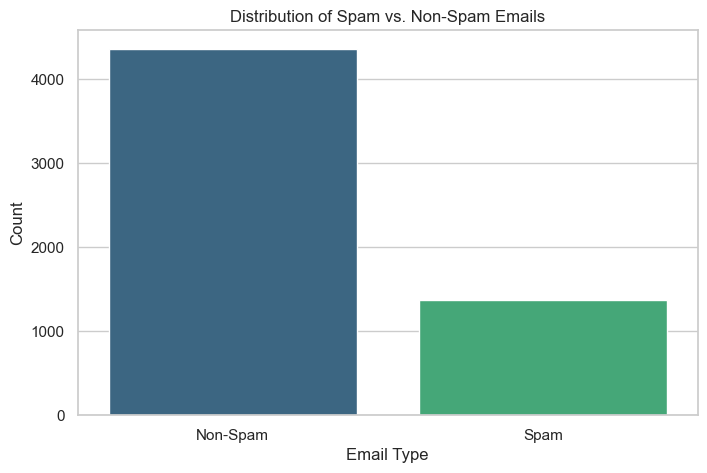

Spam distribution plot generated.


In [41]:
sns.set(style='whitegrid')
spam_distribution = df['spam'].value_counts()
# Plotting the distribution
plt.figure(figsize=(8, 5), facecolor='WHITE')
spam_distribution_plot = sns.barplot(x=spam_distribution.index, y=spam_distribution.values, palette='viridis')
spam_distribution_plot.set_title('Distribution of Spam vs. Non-Spam Emails')
spam_distribution_plot.set_xlabel('Email Type')
spam_distribution_plot.set_ylabel('Count')
spam_distribution_plot.set_xticklabels(['Non-Spam', 'Spam'])
plt.show()
print('Spam distribution plot generated.')